In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.feature_selection import RFE

In [11]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [12]:
from sklearn.svm import LinearSVC

In [13]:
from sklearn.feature_selection import SelectFromModel

In [14]:
from sklearn import metrics

In [15]:
from numpy import mean
from numpy import std
from numpy import amin
from numpy import amax

In [16]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
import math

In [19]:
from sklearn.model_selection import RepeatedKFold

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
df = pd.read_csv('../../data/extracted_features_round4_training.csv', header=0)

In [22]:
df = df.drop(columns='Unnamed: 0')

In [23]:
#df = df[['CV', 'TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TABSSIMBERT', 'AKWPWMEAN',
#       'TAWSSIMPSPACY', 'TKWAORATIO', 'TAKWSIMSPACY', 'TMIKWP', 'TABSSIMSPACY',
#       'TAFSSIMSPACY', 'TAMIKWWSSIMSPACY', 'TKWAOWRATIO', 'TAFSSD']]

In [24]:
scaler = StandardScaler()

In [25]:
X = df.drop(columns='CV')

In [26]:
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns,index = df.index)

In [27]:
y = df['CV']

In [78]:
df.columns

Index(['CV', 'TL', 'AL', 'TWC', 'AWC', 'TSC', 'ASC', 'TALRATIO', 'TAWCRATIO',
       'TASCRATIO', 'TP', 'AP', 'TAPD', 'TAPMEAN', 'TS', 'AS', 'TASD',
       'TASMEAN', 'TASCCRATIO', 'TASCCD', 'TKWC', 'AKWC', 'TAKWCRATIO',
       'AMIKWP', 'TMIKWS', 'AMIKWS', 'AFSP', 'TAFSPMEAN', 'TAFSPD', 'AFSS',
       'TAFSSMEAN', 'TAFSSD', 'TMIKWAORATIO', 'TKWAORATIO', 'TKWAOWRATIO',
       'TKWPMEAN', 'AKWPMEAN', 'TAKWPMEAN', 'TAKWPD', 'TKWPWMEAN', 'AKWPWMEAN',
       'TAKWPWMEAN', 'TAKWPWD', 'TAMIKWFP', 'TAMIKWDIST', 'TAKWDIST',
       'TASIMSPACY', 'TABSSIMSPACY', 'TAWSSIMSPACY', 'TAASSIMSPACY',
       'TAFSSIMSPACY', 'TABSSIMPSPACY', 'TAWSSIMPSPACY', 'TAGSSIMRATIOSPACY',
       'TVC', 'AVC', 'TAVCD', 'TNC', 'ANC', 'TANCD', 'TABSSIMBERT',
       'TAWSSIMBERT', 'TAASSIMSBERT', 'TAFSSIMBERT', 'TABSSIMPBERT',
       'TAWSSIMPBERT', 'TAGSSIMRATIOBERT', 'TAMIKWASSIMSPACY',
       'TAMIKWBSSIMSPACY', 'TAMIKWWSSIMSPACY', 'TMIKWP', 'TAMKWSSIMSPACY',
       'TAMKWSP', 'TAMKWSPD', 'TAMKWSS', 'TAMKWSSD', 'TA

In [26]:
cor = df.corr()

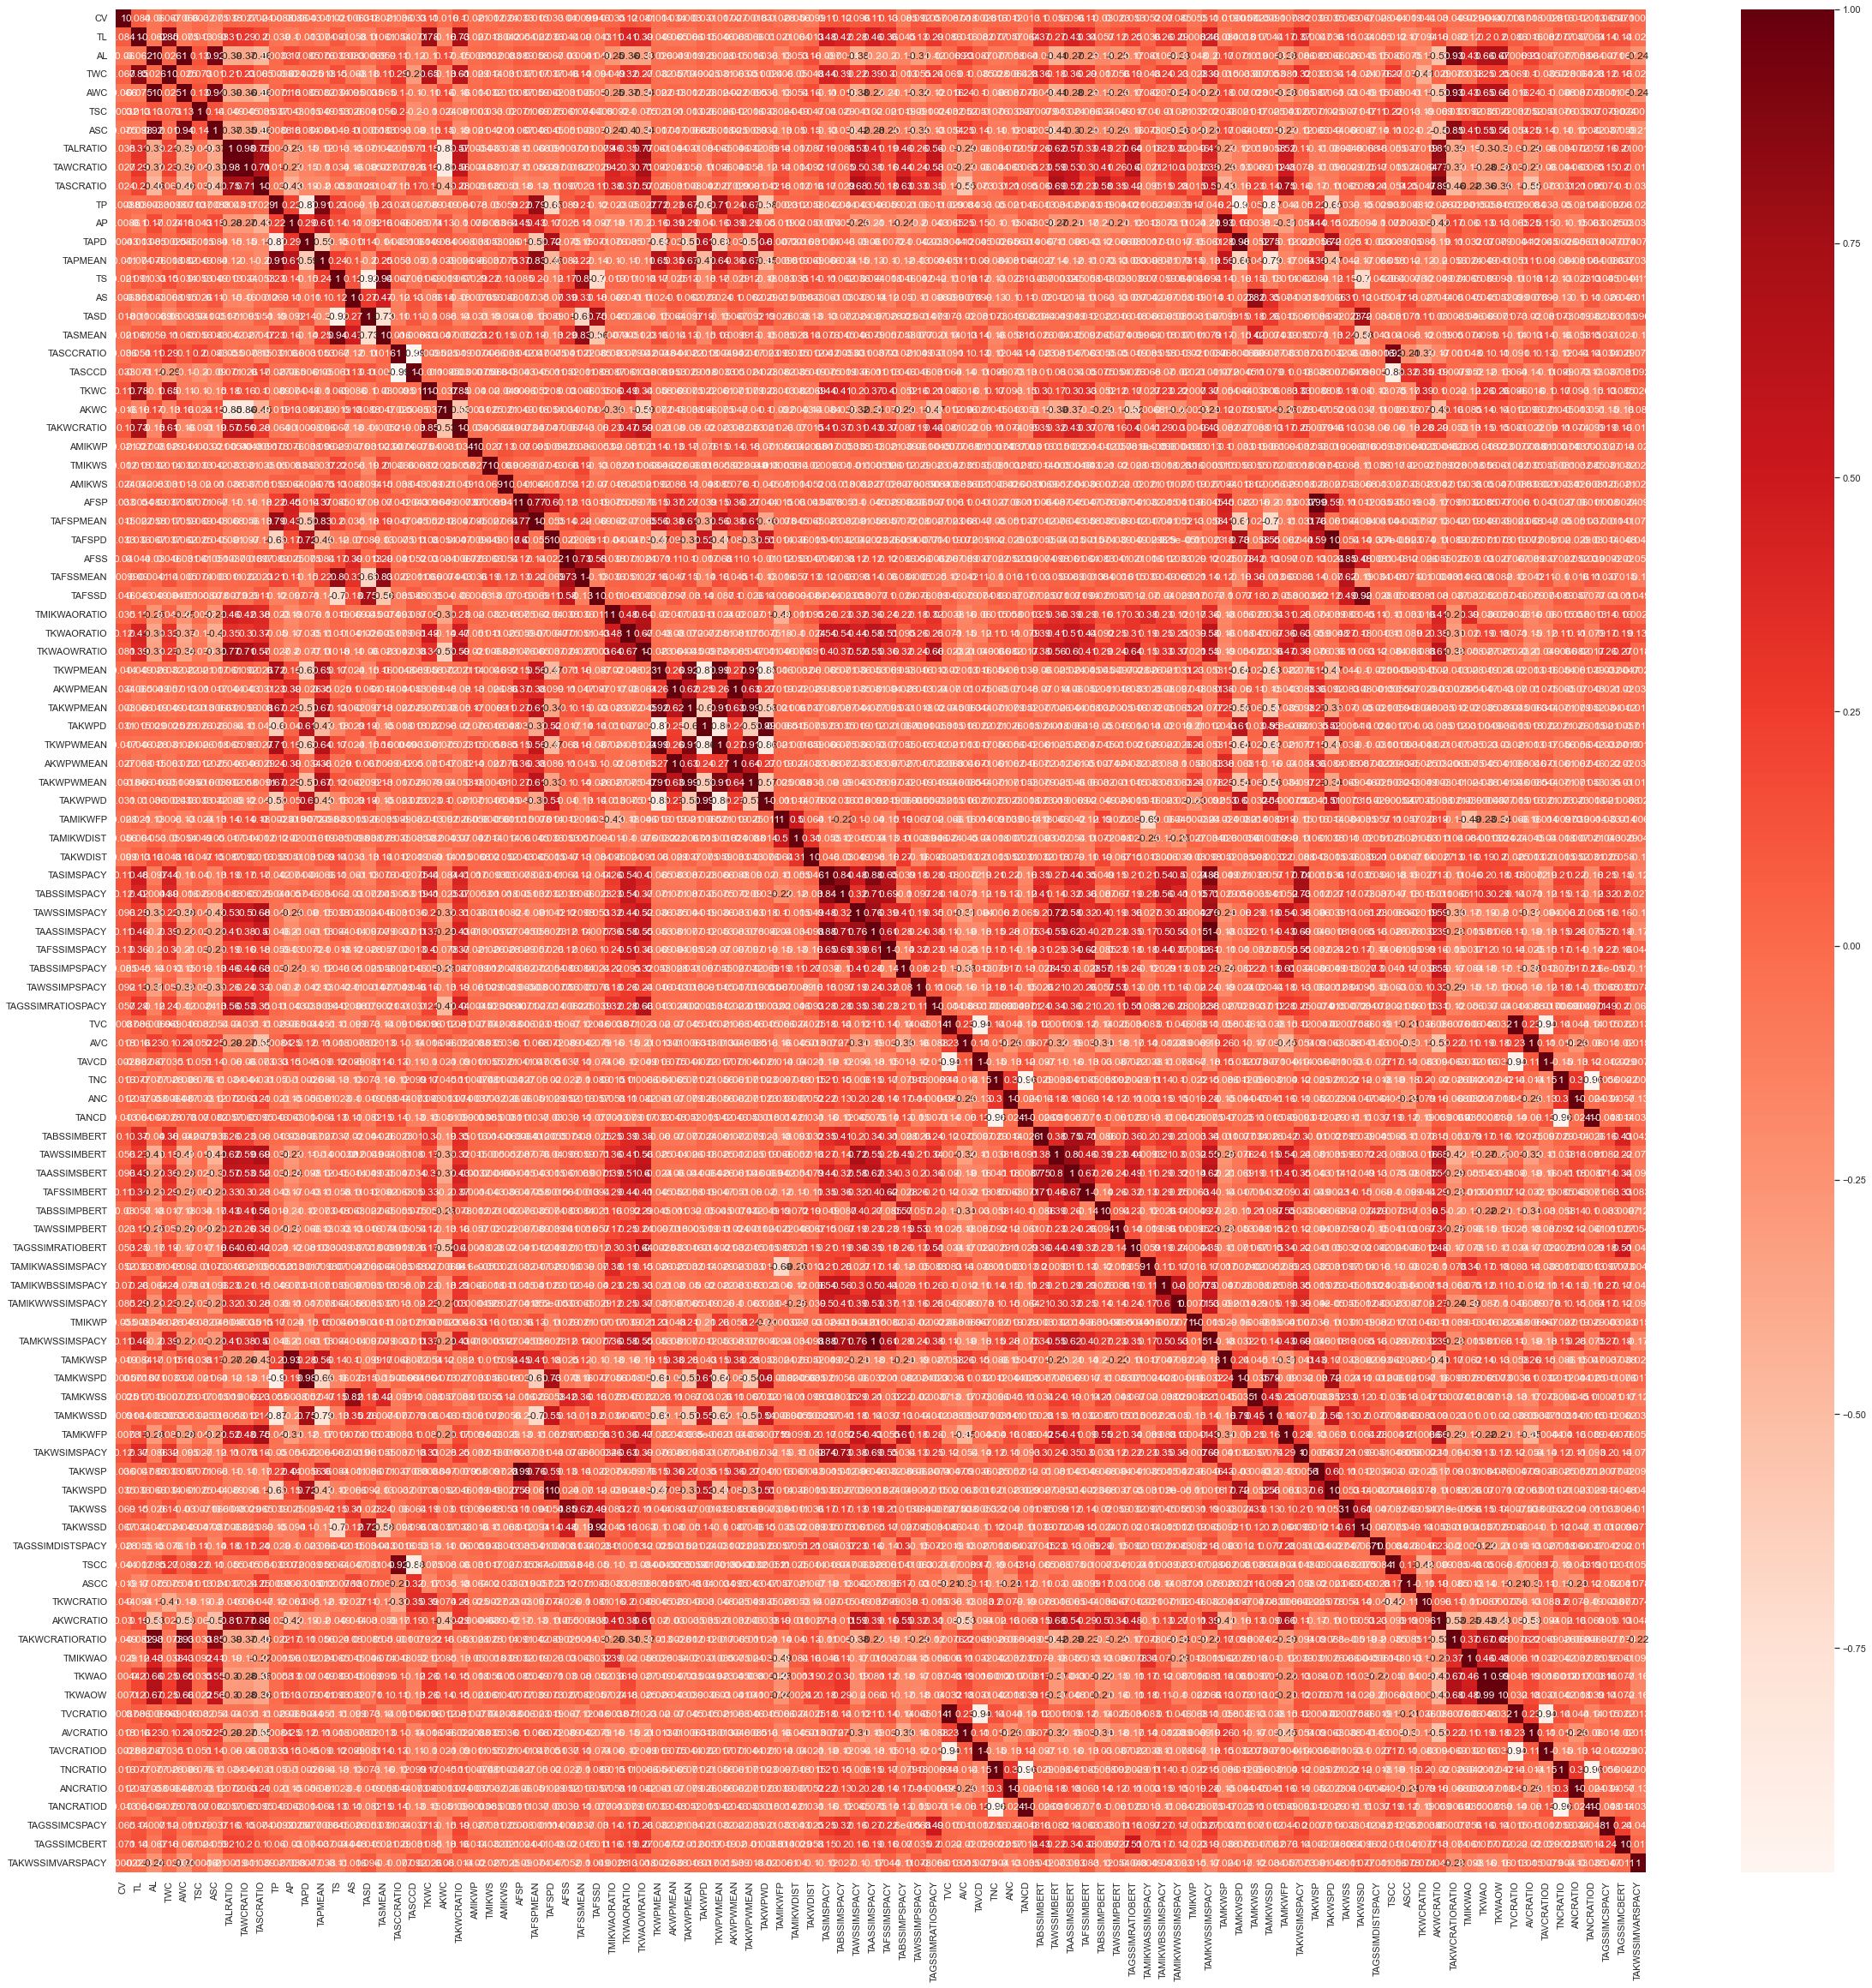

In [27]:
sns.set(rc = {'figure.figsize':(40,40)})
plot = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [494]:
fig = plot.get_figure()

In [495]:
fig.savefig('correlation_heatmap_round1.png')

In [496]:
plt.savefig('mp.png')

<Figure size 576x1080 with 0 Axes>

In [79]:
feature_list = list(X.columns)

In [80]:
features = np.array(X)

In [81]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [82]:
reg = LassoCV(cv=cv, tol=0.0007)

In [83]:
reg.fit(X, y)

LassoCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42), tol=0.0007)

In [84]:
print("Best alpha: %f" % reg.alpha_)
print("Best r2 score: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " features and eliminated the other " +  str(sum(coef == 0)) + " features")
#cross_val_score(reg, X, y, cv=10).mean()

Best alpha: 0.028091
Best r2 score: 0.038829
Lasso picked 15 features and eliminated the other 84 features


In [85]:
imp_coef = coef.sort_values()

In [86]:
imp_coef

TABSSIMPSPACY      -0.035179
TAKWDIST           -0.025962
TMIKWP             -0.008654
TAMKWSSIMSPACY      0.000000
TAMIKWWSSIMSPACY    0.000000
                      ...   
TKWC                0.008814
TAKWSIMSPACY        0.013257
TABSSIMBERT         0.017541
TAWSSIMPSPACY       0.018534
TAWSSIMSPACY        0.029113
Length: 99, dtype: float64

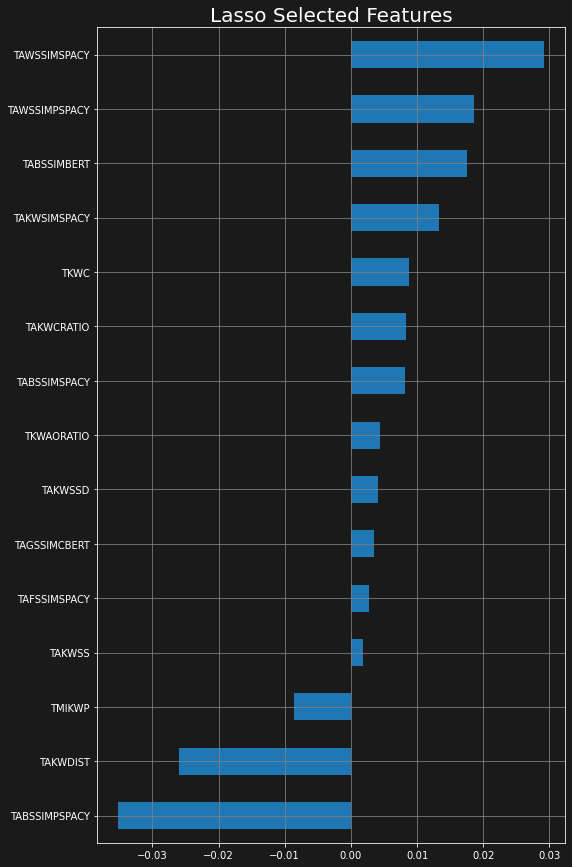

In [87]:
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)
ax = imp_coef[imp_coef!=0].plot(kind = "barh")
plt.grid(c='gray')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
fig = ax.get_figure()
ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Lasso Selected Features",
          fontsize=20,
          color="white")
fig.savefig('../../images/lasso_features.png', transparent=False)

In [88]:
imp_coef_abs = coef.abs().sort_values(ascending=False)
imp_coef_abs[imp_coef_abs!=0].keys()

Index(['TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TAWSSIMPSPACY',
       'TABSSIMBERT', 'TAKWSIMSPACY', 'TKWC', 'TMIKWP', 'TAKWCRATIO',
       'TABSSIMSPACY', 'TKWAORATIO', 'TAKWSSD', 'TAGSSIMCBERT', 'TAFSSIMSPACY',
       'TAKWSS'],
      dtype='object')

In [89]:
X = X[['TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TAWSSIMPSPACY', 'TABSSIMBERT', 
      'TAKWSIMSPACY', 'TKWC', 'TMIKWP', 'TAKWCRATIO', 'TABSSIMSPACY', 'TKWAORATIO', 
      'TAKWSSD', 'TAGSSIMCBERT', 'TAFSSIMSPACY', 'TAKWSS']]

In [90]:
reg.fit(X, y)

LassoCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42), tol=0.0007)

In [91]:
print("Best alpha: %f" % reg.alpha_)
print("Best r2 score: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " features and eliminated the other " +  str(sum(coef == 0)) + " features")
#cross_val_score(reg, X, y, cv=10).mean()

Best alpha: 0.006958
Best r2 score: 0.050586
Lasso picked 13 features and eliminated the other 2 features


In [92]:
imp_coef = coef.sort_values()
imp_coef


TABSSIMPSPACY   -0.065942
TAKWDIST        -0.039480
TMIKWP          -0.028966
TKWAORATIO       0.000000
TAFSSIMSPACY     0.000000
TABSSIMSPACY     0.002456
TKWC             0.007403
TAKWSS           0.013294
TAKWSSD          0.013992
TAGSSIMCBERT     0.019334
TAKWCRATIO       0.020121
TAKWSIMSPACY     0.021687
TABSSIMBERT      0.023468
TAWSSIMPSPACY    0.031963
TAWSSIMSPACY     0.053412
dtype: float64

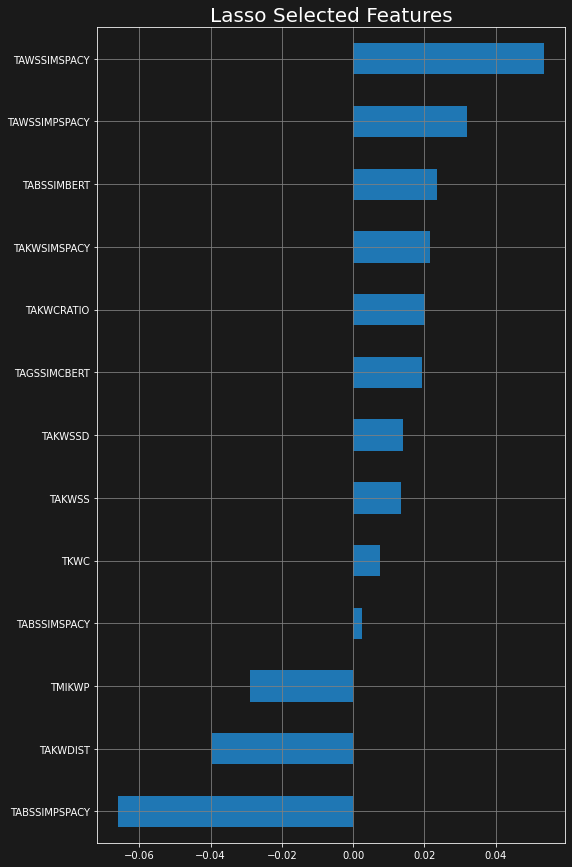

In [93]:
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)
ax = imp_coef[imp_coef!=0].plot(kind = "barh")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
fig = ax.get_figure()
ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Lasso Selected Features",
          fontsize=20,
          color="white")
plt.grid(c='gray')
fig.savefig('../../images/lasso_features_2.png', transparent=False)

In [94]:
imp_coef_abs = coef.abs().sort_values(ascending=False)
imp_coef_abs[imp_coef_abs!=0].keys()

Index(['TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TAWSSIMPSPACY', 'TMIKWP',
       'TABSSIMBERT', 'TAKWSIMSPACY', 'TAKWCRATIO', 'TAGSSIMCBERT', 'TAKWSSD',
       'TAKWSS', 'TKWC', 'TABSSIMSPACY'],
      dtype='object')

In [95]:
X = X[['TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TAWSSIMPSPACY', 'TMIKWP',
       'TABSSIMBERT', 'TAKWSIMSPACY', 'TAKWCRATIO', 'TAGSSIMCBERT', 'TAKWSSD',
       'TAKWSS', 'TKWC', 'TABSSIMSPACY']]

In [96]:
reg.fit(X, y)

LassoCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42), tol=0.0007)

In [97]:
print("Best alpha: %f" % reg.alpha_)
print("Best r2 score: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " features and eliminated the other " +  str(sum(coef == 0)) + " features")
#cross_val_score(reg, X, y, cv=10).mean()

Best alpha: 0.003054
Best r2 score: 0.051197
Lasso picked 13 features and eliminated the other 0 features


In [98]:
imp_coef = coef.sort_values()
imp_coef


TABSSIMPSPACY   -0.071553
TAKWDIST        -0.041992
TMIKWP          -0.032765
TABSSIMSPACY     0.001114
TKWC             0.006728
TAKWSS           0.015396
TAKWSSD          0.015713
TAGSSIMCBERT     0.022250
TAKWCRATIO       0.022488
TAKWSIMSPACY     0.022943
TABSSIMBERT      0.024412
TAWSSIMPSPACY    0.034221
TAWSSIMSPACY     0.057611
dtype: float64

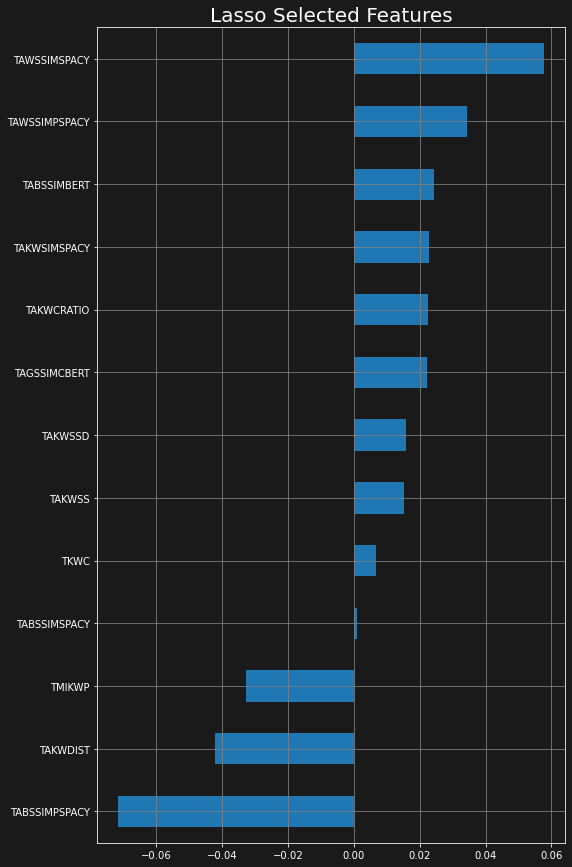

In [100]:
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)
ax = imp_coef[imp_coef!=0].plot(kind = "barh")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
plt.grid(c='gray')
fig = ax.get_figure()
ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Lasso Selected Features",
          fontsize=20,
          color="white")
fig.savefig('../../images/lasso_features_3.png', transparent=False)

In [101]:
imp_coef_abs = coef.abs().sort_values(ascending=False)
imp_coef_abs[imp_coef_abs!=0].keys()

Index(['TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TAWSSIMPSPACY', 'TMIKWP',
       'TABSSIMBERT', 'TAKWSIMSPACY', 'TAKWCRATIO', 'TAGSSIMCBERT', 'TAKWSSD',
       'TAKWSS', 'TKWC', 'TABSSIMSPACY'],
      dtype='object')

In [102]:
lasso_best = Lasso(alpha=reg.alpha_)

In [78]:
r2 = cross_val_score(lasso_best, X, y, scoring='r2', cv=cv)
r2

array([ 0.04867268, -0.0470284 ,  0.09993769, -0.03405569,  0.04377071,
       -0.00126584,  0.06910281, -0.03187244,  0.03661035,  0.01953653,
       -0.01406488,  0.00791498, -0.01770121,  0.08084842,  0.03632165,
        0.05870676,  0.02768156,  0.0020019 , -0.00110177, -0.00491309,
        0.02692174,  0.05778792,  0.05136904,  0.04538436,  0.02174026,
       -0.03148521, -0.00070388,  0.00977954,  0.04989935,  0.00053447])

In [84]:
print("Mean: %f" % mean(r2))
print("SD: %f" % std(r2))
print("Max: %f" % amax(r2))
print("Min: %f" % amin(r2))

Mean: 0.020344
SD: 0.035696
Max: 0.099938
Min: -0.047028


In [79]:
mae = cross_val_score(lasso_best, X, y, scoring='neg_mean_absolute_error', cv=cv)
mae

array([-0.51746725, -0.56282619, -0.47552731, -0.60483007, -0.5405584 ,
       -0.59008979, -0.50812026, -0.53107804, -0.51821302, -0.53199529,
       -0.60037372, -0.60049211, -0.53057481, -0.49010666, -0.56449342,
       -0.55117631, -0.49581139, -0.51720384, -0.51034693, -0.51452657,
       -0.56810215, -0.53607344, -0.62023003, -0.45695921, -0.59717808,
       -0.55952205, -0.46321877, -0.53343823, -0.50801382, -0.52545089])

In [85]:
print("Mean: %f" % mean(mae))
print("SD: %f" % std(mae))
print("Max: %f" % amax(mae))
print("Min: %f" % amin(mae))

Mean: -0.537467
SD: 0.041996
Max: -0.456959
Min: -0.620230


In [82]:
rmse = cross_val_score(lasso_best, X, y, scoring='neg_root_mean_squared_error', cv=cv)
rmse

array([-0.66040165, -0.69973538, -0.5966153 , -0.73801617, -0.66995927,
       -0.69930938, -0.64599985, -0.64743354, -0.64142149, -0.63916074,
       -0.754966  , -0.72615802, -0.6673929 , -0.61601232, -0.698852  ,
       -0.6682339 , -0.63699398, -0.63945445, -0.62358295, -0.61351956,
       -0.70526465, -0.67214517, -0.74313567, -0.57735546, -0.73099733,
       -0.71028571, -0.55618029, -0.64681301, -0.64400404, -0.61853115])

In [86]:
print("Mean: %f" % mean(rmse))
print("SD: %f" % std(rmse))
print("Max: %f" % amax(rmse))
print("Min: %f" % amin(rmse))

Mean: -0.662931
SD: 0.049003
Max: -0.556180
Min: -0.754966


In [104]:
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [105]:
lasso_best.fit(train_features, train_labels)

Lasso(alpha=0.003054089953817799)

In [106]:
predictions = lasso_best.predict(test_features)

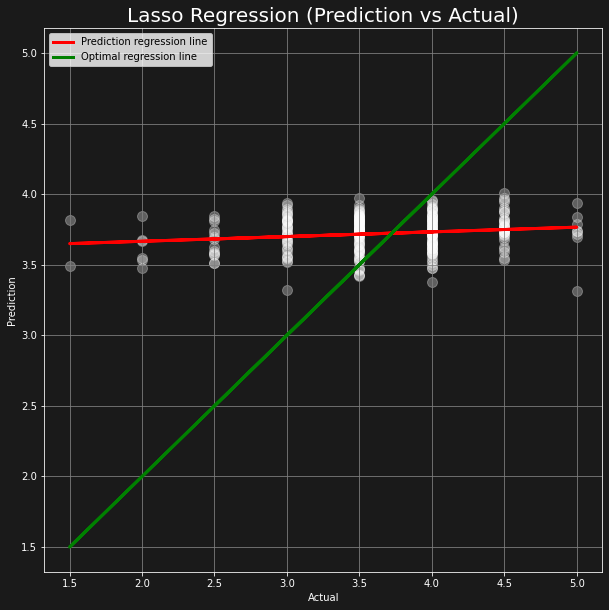

In [108]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(test_labels, predictions,  color='white', alpha=0.3, s=100)
m, b = np.polyfit(test_labels, predictions, 1)
ax.plot(test_labels, m*test_labels+b, color='red', linewidth=3, label="Prediction regression line")
ax.legend()
ax.plot(test_labels, test_labels, color='green', linewidth=3, label="Optimal regression line")
ax.legend()
plt.xlabel("Actual")
plt.ylabel("Prediction")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Lasso Regression (Prediction vs Actual)",
          fontsize=20,
          color="white")
plt.grid(c='gray')

plt.savefig('../../images/lasso_regression.png', transparent=False)

In [39]:
pred = reg.predict(test_features)

In [162]:
['CV', 'TL', 'AL', 'TABSIMSPACY', 'TAKWDIST', 'TAWSSIMSPACY', 'TABSIMBERT', 'AMIKWP']

['CV',
 'TL',
 'AL',
 'TABSIMSPACY',
 'TAKWDIST',
 'TAWSSIMSPACY',
 'TABSIMBERT',
 'AMIKWP']

In [163]:
reg.score(X,y)

0.04250419751862489

In [42]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_labels,pred, squared = False)

In [43]:
rmse

0.6677690392706563

In [44]:
y_true, predictions = np.array(test_labels), np.array(pred)
mae = np.mean(np.abs(test_labels - pred))

In [45]:
mae

0.5309640910607626

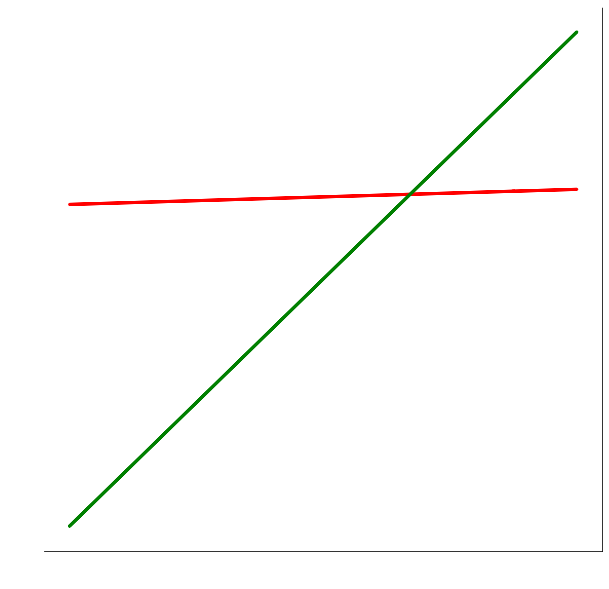

In [164]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(test_labels, pred,  color='white', alpha=0.3, s=100)
m, b = np.polyfit(test_labels, pred, 1)
ax.plot(test_labels, m*test_labels+b, color='red', linewidth=3)
ax.plot(test_labels, test_labels, color='green', linewidth=3)
plt.xlabel("Actual")
plt.ylabel("Prediction")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')

plt.savefig('../../images/final_model.png', transparent=True)

In [ ]:
y_name = 'CV'
features_names = [f'{i}' for i in X.columns]  
column_names = features_names + [y_name]

plot_size=7
num_plots_x=5   # No. of plots in every row
num_plots_y = math.ceil(len(features_names)/num_plots_x)   # No. of plots in y direction

g = sns.FacetGrid(pd.DataFrame(features_names), col=0, col_wrap=5, sharex=False)
for ax, x_var in zip(g.axes, features_names):
    ax.set(ylim=(1, 5))
    sns.regplot(data=df, x=x_var, y=y_name, ax=ax, scatter_kws={"color": "white", "alpha" : 0.1}, line_kws={"color": "red"})
    
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    ax.spines['left'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['bottom'].set_color('white')

    ax.set_facecolor((0.1, 0.1, 0.1))
    plt.grid(c='gray')
    
g.tight_layout()
fig = g.fig
fig.patch.set_facecolor((0.1, 0.1, 0.1))
fig.savefig('../../images/feature_regression.png', transparent=False)

In [29]:
TAWSSIMSPACY = df['TAWSSIMSPACY']

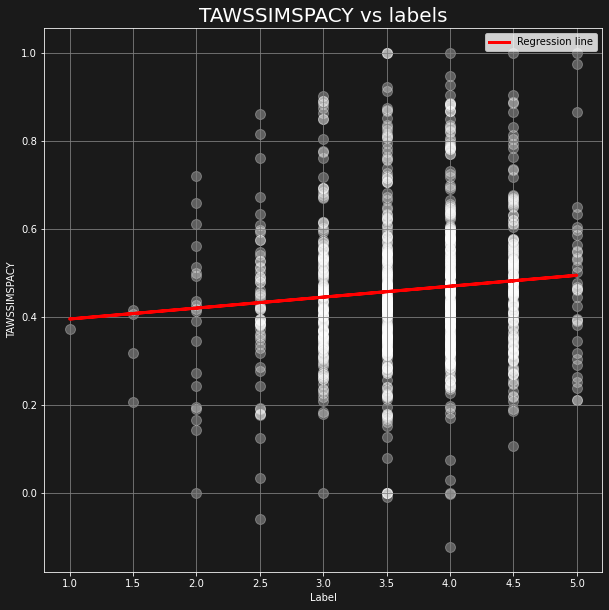

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(y, TAWSSIMSPACY,  color='white', alpha=0.3, s=100)
m, b = np.polyfit(y, TAWSSIMSPACY, 1)
ax.plot(y, m*y+b, color='red', linewidth=3, label="Regression line")
ax.legend()
plt.xlabel("Label")
plt.ylabel("TAWSSIMSPACY")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="TAWSSIMSPACY vs labels",
          fontsize=20,
          color="white")
plt.grid(c='gray')
plt.savefig('../../images/tawssimspacy_distribution.png', transparent=False)

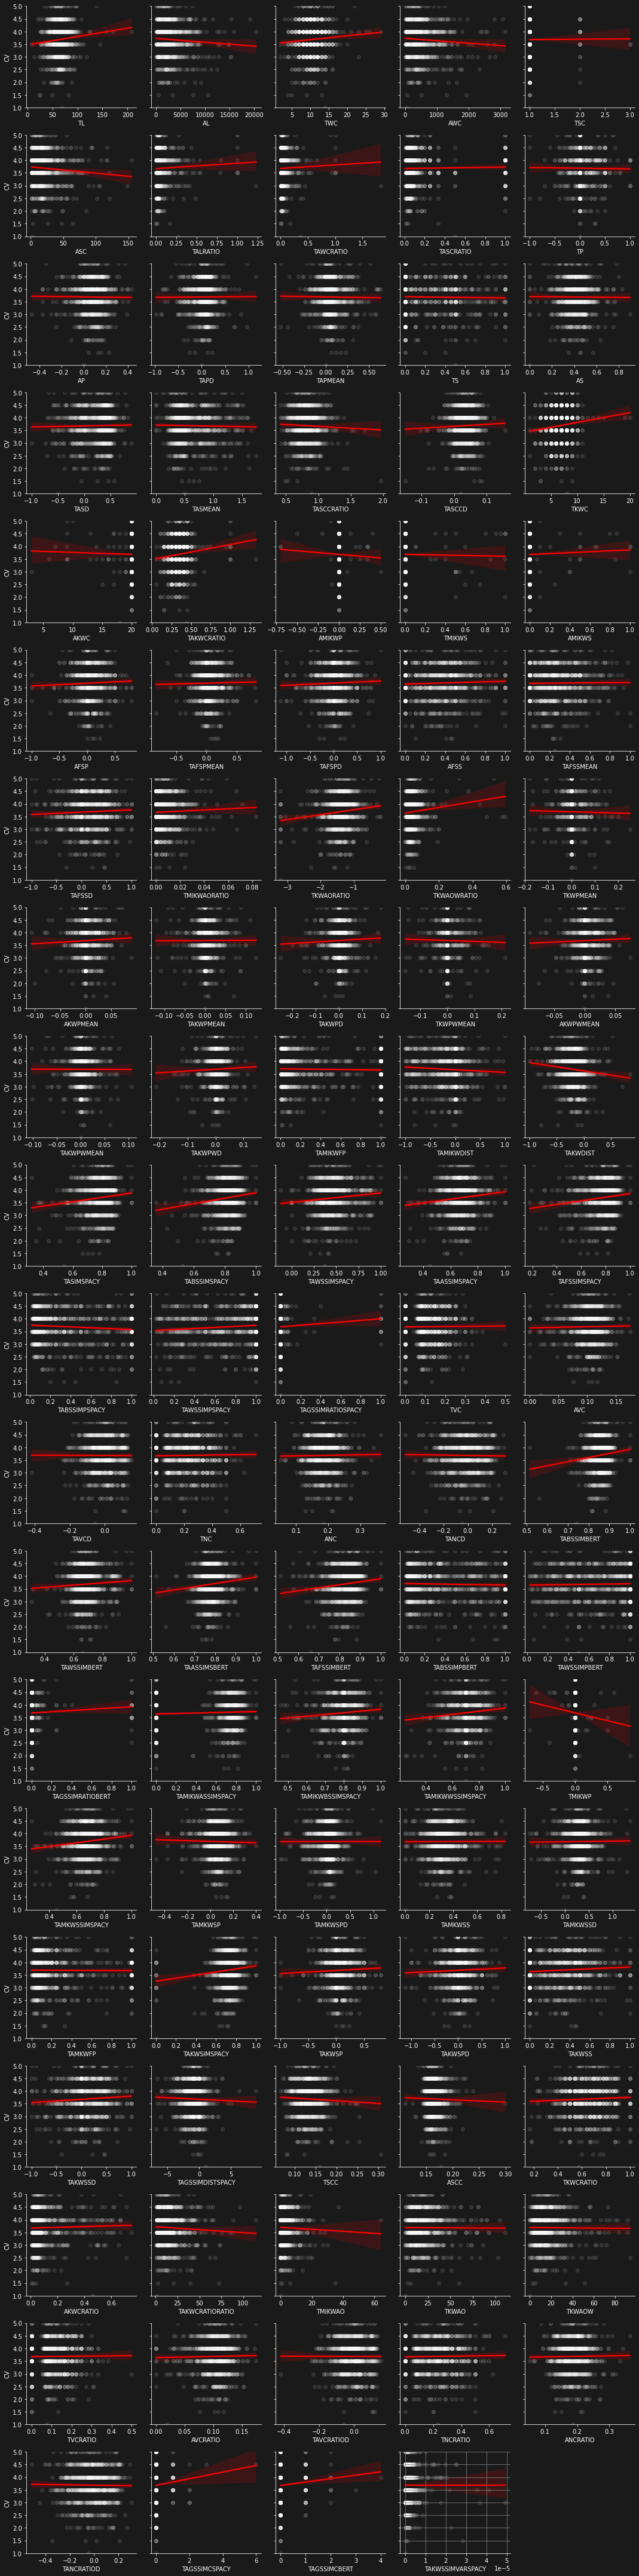

In [28]:
y_name = 'CV'
features_names = [f'{i}' for i in X.columns]  
column_names = features_names + [y_name]

plot_size=7
num_plots_x=5   # No. of plots in every row
num_plots_y = math.ceil(len(features_names)/num_plots_x)   # No. of plots in y direction

g = sns.FacetGrid(pd.DataFrame(features_names), col=0, col_wrap=5, sharex=False)
for ax, x_var in zip(g.axes, features_names):
    ax.set(ylim=(1, 5))
    sns.regplot(data=df, x=x_var, y=y_name, ax=ax, scatter_kws={"color": "white", "alpha" : 0.1}, line_kws={"color": "red"})
    
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    ax.spines['left'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['bottom'].set_color('white')

    ax.set_facecolor((0.1, 0.1, 0.1))
    plt.grid(c='gray')
    
g.tight_layout()
fig = g.fig
fig.patch.set_facecolor((0.1, 0.1, 0.1))
fig.savefig('../../images/feature_regression.png', transparent=False)

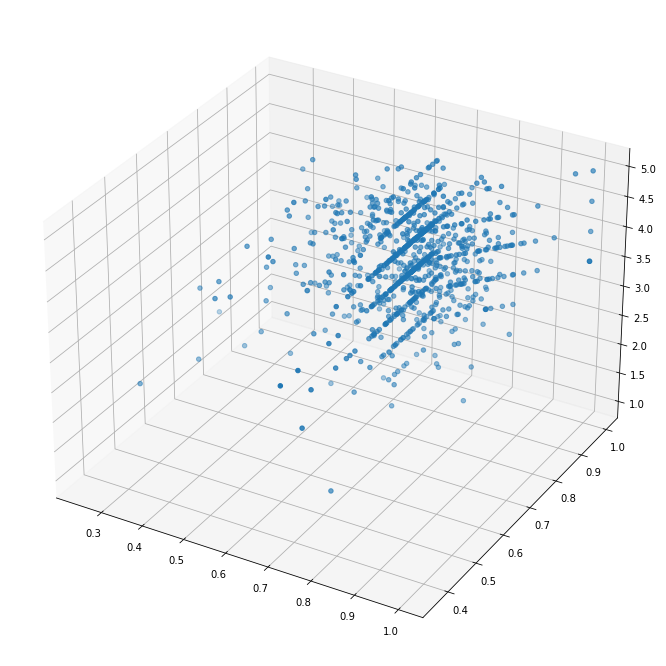

In [73]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals = df['TAMIKWWSSIMSPACY']
sequence_containing_y_vals = df['TABSSIMSPACY']
sequence_containing_z_vals = df['CV']

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()